Question 11 of DS questionnaire proposed to César Augusto Noronha on 10/29/2021

Database: Data from Pima Indians Diabetes Database (2016)

Python: You need to implement a logistic regression classifier with online learning where some of the weights might be fixed at times during learning. How would you do this? 

Instructions: You need to have the file "diabetes.csv" on the same folder of this file on Jupyter notebooks. Run the sequence below. On the last part (5/5) you may use the model created to predict values, you may update the database and retrains it and you may change the weights manually.

# Importing libraries 1/4

In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Preparing Dataframes & variables 2/4

In [2]:
# Donwloading Databases files and preparing it.

# Data from Pima Indians Diabetes Database (2016)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset, ajust  columns' names
pima_raw = pd.read_csv("diabetes.csv")
pima_raw.columns = col_names
input_columns = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']
pima_raw = pima_raw[input_columns]

pima,pima_extra = pima_raw.iloc[0:-10],pima_raw.iloc[-10:] #later we may implement add from 10 extra

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variables 

accumulated_cases = 0
temp_data = pd.DataFrame(data=None, columns=input_columns, index=None)

In [3]:
temp_data

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label


# Training model 3/4

In [4]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
model_main = LogisticRegression(max_iter=1000)
# fit the model with data
model_main.fit(X_train,y_train)

output = open('Diabetes_model', 'wb') # Creating file
pickle.dump(model_main, output) # saving file
output.close()

# testing model
y_pred=model_main.predict(X_test)

# model results
model_accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:",model_accuracy.round(4))
print("Precision:",precision)
print("Recall:",recall.round(4))

Accuracy: 0.8316
Precision: 0.78
Recall: 0.65


# Plotting metrics 4/4

Text(0.5, 257.44, 'Predicted label')

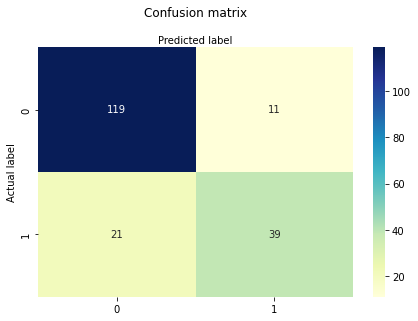

In [5]:
#Creating a confusion matric Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Button 1 configuration 1/5
button uses the model to preview one result

In [6]:
# Button 1

# Button variables
pregnant1 = widgets.Text(description="pregnant")
insulin1 = widgets.Text(description="insulin")
bmi1 = widgets.Text(description="bmi")
age1 = widgets.Text(description="age")
glucose1 = widgets.Text(description="glucose")
bp1 = widgets.Text(description="bp")
pedigree1 = widgets.Text(description="pedigree")
button1 = widgets.Button(description="Predict")

# What the botton does
def simulator1(sender):
    entry=[[
                # Receiving inputs
                float(pregnant1.value if pregnant1.value else 0), 
                float(insulin1.value if insulin1.value else 0), 
                float(bmi1.value if bmi1.value else 0),       
                float(age1.value if age1.value else 0), 
                float(glucose1.value if glucose1.value else 0), 
                float(bp1.value if bp1.value else 0),     
                float(pedigree1.value if pedigree1.value else 0)  
                
             ]]
    if model_main.predict(entry)[0] == 1:
        print('The model appoints the subjet has Diabetes')
    else:
        print('The model appoints the subjet does not have Diabetes')
        
top = VBox([pregnant1, insulin1, bmi1, age1,glucose1,bp1,pedigree1])
button1.on_click(simulator1) 
top1 = HBox([top, button1])

# Button 2 configuration 2/5
writes and adds samples to the data, after receive 3 new samples, it retrains the model

In [7]:
# Button 2
pregnant2 = widgets.Text(description="pregnant")
insulin2 = widgets.Text(description="insulin")
bmi2 = widgets.Text(description="bmi")
age2 = widgets.Text(description="age")
glucose2 = widgets.Text(description="glucose")
bp2 = widgets.Text(description="bp")
pedigree2 = widgets.Text(description="pedigree")
label2 = widgets.Text(description="label")
button2 = widgets.Button(description="Add to Data")

# What the botton does
def simulator2(sender):
    global accumulated_cases, model_main, R_model, beer_data_to_train, temp_data
    #import variables from outside the function
    entry=[[
                float(pregnant2.value if pregnant2.value else 0), 
                float(insulin2.value if insulin2.value else 0), 
                float(bmi2.value if bmi2.value else 0),       
                float(age2.value if age2.value else 0), 
                float(glucose2.value if glucose2.value else 0), 
                float(bp2.value if bp2.value else 0),     
                float(pedigree2.value if pedigree2.value else 0),
                float(label2.value if label2.value else 0) 
        
             ]]
    data_entry = pd.DataFrame(data=entry, columns=input_columns, index=None) 
    temp_data = temp_data.append(data_entry)
    accumulated_cases += 1 
    print("Data to update on the model:")
    print(temp_data)
    #print(temp_data)
    #print(data_entry)
    if accumulated_cases >= 3:
        [model_main, model_accuracy] = retrain(pima,temp_data)
        temp_data = pd.DataFrame(data=None, columns=input_columns, index=None) 
        accumulated_cases = 0
     
middle = VBox([pregnant2, insulin2, bmi2, age2,glucose2,bp2,pedigree2, label2])
button2.on_click(simulator2) 
middle1 = HBox([middle,button2])

# Button 3 configuration 3/5
Allows weights alteration

In [8]:
model_main.coef_[0][:]


# Button 3
pregnant3 = widgets.Text(description="w pregnant")
insulin3 = widgets.Text(description="w insulin")
bmi3 = widgets.Text(description="w bmi")
age3 = widgets.Text(description="w age")
glucose3 = widgets.Text(description="w glucose")
bp3 = widgets.Text(description="w bp")
pedigree3 = widgets.Text(description="w pedigree")
button3 = widgets.Button(description="Update weights")
button4 = widgets.Button(description="Print weights")

# What the botton does
def simulator3(sender):
    global accumulated_cases, model_main, R_model, beer_data_to_train, temp_data
    #import variables from outside the function
    entry=[[
                float(pregnant3.value if pregnant3.value else model_main.coef_[0][0]), 
                float(insulin3.value if insulin3.value else model_main.coef_[0][1]), 
                float(bmi3.value if bmi3.value else model_main.coef_[0][2]),       
                float(age3.value if age3.value else model_main.coef_[0][3]), 
                float(glucose3.value if glucose3.value else model_main.coef_[0][4]), 
                float(bp3.value if bp3.value else model_main.coef_[0][5]),     
                float(pedigree3.value if pedigree3.value else model_main.coef_[0][6]),
        
             ]]
    data_entry = pd.DataFrame(data=entry, columns=None, index=None)
    model_main.coef_[0] = data_entry
    print('New weights of model: ')
    print(model_main.coef_[0])

# What the botton does
def simulator4(sender):
    print(model_main.coef_[0])

middle3 = VBox([pregnant3, insulin3, glucose3])
middle32 = VBox([age3,bmi3,bp3,pedigree3])
middle4 = HBox([middle3, middle32])

# buttons setup
button3.on_click(simulator3) 
button4.on_click(simulator4) 
botton1 = VBox([button3, button4,middle4])

# Function Retrain 4/5
Fuction that retrains and test the model

In [9]:
# Retrain model
def retrain(df1,df2):
    global model_main, model_accuracy #import variables from outside the function
    print('Training new model...')
    pima_data_temp = df1.append(df2)
    # Creates empty model
    model_temp = LogisticRegression(max_iter=1000)
    # Train model
    y2 = pima_data_temp['label']
    X2 = pima_data_temp[['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0) #Split data
    model_temp.fit(X2_train, y2_train) # Train model
    
    
    y2_pred = model_temp.predict(X2_test) # tests model
    accuracy_temp = metrics.accuracy_score(y2_test, y2_pred)
    print('testing new model...')
    
    # Compares model's results
    if accuracy_temp > model_accuracy:
        print('We trained a new model with the data, the new accuracy is {0:.2f}'.format(accuracy_temp.round(4)))
        model_accuracy, model_main  = accuracy_temp, model_temp
    else:
        print('The New model isnt a better model, discarting changings')
        
    return [model_main, model_accuracy]

# Display 5/5
Allows os to add the input information and runs the code

In [20]:
# Display
inputs1 = VBox([top1])
inputs2 = VBox([middle1])
inputs3 = VBox([botton1 ])

inputs4 = HBox([inputs1,inputs2])
inputs4 = VBox([inputs4,inputs3])

display(inputs4)

The model appoints the subjet does not have Diabetes
[ 1.05683829e-01 -7.38874501e-04  7.82463833e-02  1.26501739e-02
  3.15166263e-02 -1.28135296e-02  7.71820760e-01]
New weights of model: 
[ 1.05683829e-01 -7.38874501e-04  7.82463833e-02  1.26501739e-02
  3.15166263e-02 -1.28135296e-02  7.71820760e-01]
